In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
iris_df = pd.read_csv('iris.csv')

In [18]:
df = iris_df.select_dtypes(include = ["int", "float"])
list(df.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [19]:
def learn(X, y, alpha, max_epochs):
    w = [0, 0, 0, 0, 0]
    
    for n in range(max_epochs):
        for i in range(len(X)):
            y_hat = np.sign(np.dot(w, X[i].T))
            if y_hat != y[i]:
                w = w + alpha * y[i] * X[i]
        if numErrors(X, y, w) == 0:
            return w, n
            
    return w, n

In [20]:
def numErrors(X, y, w):
    y_hat = np.sign(np.dot(w, X.T))
    error = y == y_hat
    return (len(error) - sum(error)) / len(error)

In [21]:
iris02_df = iris_df[iris_df['target'] != 1]
iris12_df = iris_df[iris_df['target'] != 0]

In [22]:
y = iris02_df['target'].to_numpy()

y_ = [i - 1 for i in y]

iris02_df_no_y = iris02_df.drop('target', axis = 1)
iris02_df_no_y.insert(0, 'bias', 1)
iris02_df_no_y_arr = iris02_df_no_y.to_numpy()

In [30]:
y12 = iris12_df['target'].to_numpy()

y12_ = []

for i in y12:
    if i == 1:
        y12_.append(-1)
    elif i == 2:
        y12_.append(1)

iris12_df_no_y = iris12_df.drop('target', axis = 1)
iris12_df_no_y.insert(0, 'bias', 1)
iris12_df_no_y_arr = iris12_df_no_y.to_numpy()

In [40]:
max_epochs = 1000
alpha = 1

print(learn(iris02_df_no_y_arr, y_, alpha, max_epochs))

(array([-1. , -2.7, -3.9,  7.8,  4.4]), 2)


In [43]:
max_epochs = 1000
alpha = 1

print(learn(iris12_df_no_y_arr, y12_, alpha, max_epochs))

(array([ -61. ,  -81. , -122.2,   95.2,  318.8]), 999)


In [26]:
corr_matrix = iris02_df.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.217326,0.910355,0.847342,0.840970
sepal width (cm),-0.217326,1.000000,-0.473993,-0.449069,-0.545921
petal length (cm),0.910355,-0.473993,1.000000,0.954443,0.971023
petal width (cm),0.847342,-0.449069,0.954443,1.000000,0.965228
target,0.840970,-0.545921,0.971023,0.965228,1.000000


In [27]:
corr_matrix_12 = iris12_df.corr()
corr_matrix_12

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,0.553855,0.845063,0.591253,0.494305
sepal width (cm),0.553855,1.000000,0.526752,0.567999,0.308080
petal length (cm),0.845063,0.526752,1.000000,0.785947,0.742740
petal width (cm),0.591253,0.567999,0.785947,1.000000,0.815239
target,0.494305,0.308080,0.742740,0.815239,1.000000


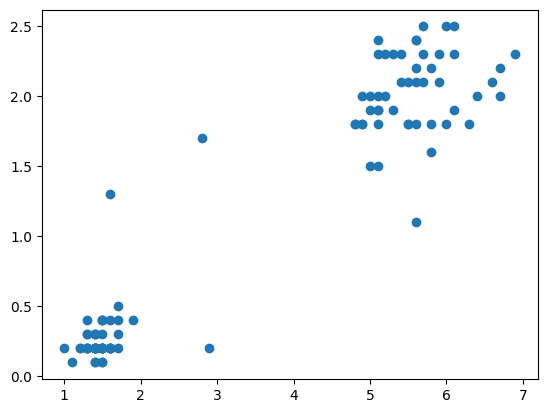

In [28]:
plt.scatter(iris02_df['petal length (cm)'], iris02_df['petal width (cm)'])
plt.show()

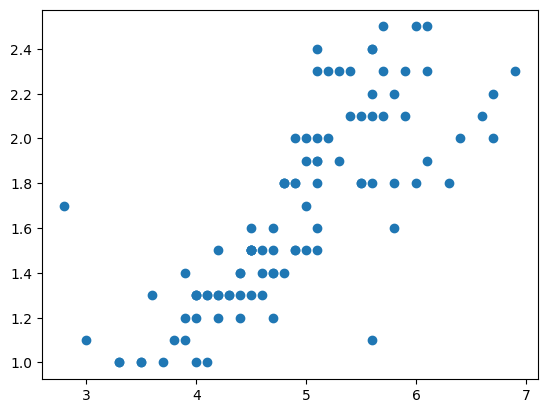

In [29]:
plt.scatter(iris12_df['petal length (cm)'], iris12_df['petal width (cm)'])
plt.show()

In [ ]:
##TODO: Code to find smallest number of features needed to correctly classify